In order to be able to graph multiple spectra simultaneously, glob was used to import multiple files into an empty list called Data.

In [1]:
import glob
Data = [] #(This is an empty list)
for each_file in glob.iglob('*.txt'):
    Data.append(each_file)
print(Data)

['EE_10uM_KK_10uM 1mm 20C.txt', 'EE_12_5uM_KK_12_5uM 1mm 20C.txt', 'EE_15uM_KK_15uM 1mm 20C.txt', 'EE_17_5uM_KK_17_5uM 1mm 20C.txt', 'EE_20uM_KK_20uM 1mm 20C#.txt', 'EE_25uM_KK_25uM 1mm 20C#.txt', 'EE_30uM_KK_30uM 1mm 20C#.txt', 'EE_35uM_KK_35uM 1mm 20C#.txt', 'EE_40uM_KK_40uM 1mm 20C#.txt', 'EE_5uM_KK_5uM 1mm 20C.txt', 'EE_60uM_KK_60uM 1mm 20C.txt', 'EE_7_5uM_KK_7_5uM 1mm 20C.txt', 'Melt EE_60uM_KK_60uM 1mm 5_95C.txt', 'Melt EE_60uM_KK_60uM 1mm 5_95C@.txt', 'PBS 1mm 20C.txt', 'Post MeltEE_60uM_KK_60uM 1mm 5C.txt', 'Pre Melt EE_60uM_KK_60uM 1mm 5C.txt']


Once read in the next challenge is to read in all of the files in the Data list and putting it in the new list Data1. At the same time the column names were changed to something sensible.

In [2]:
import pandas as pd
Data1 = []
for each_file in Data:
    each_file = pd.read_csv(each_file, skiprows=19,  sep='\s+' , header=None)
    each_file = each_file.rename(columns = 
           {0:"Wavelength", 1:"MRE", 2:"HTV"})
    Data1.append(each_file)
print(Data1)

[    Wavelength        MRE       HTV
0        260.0   0.428836   368.207
1        259.0   0.382438   369.830
2        258.0   0.390168   371.439
3        257.0   0.552087   373.036
4        256.0   0.286790   374.594
..         ...        ...       ...
66       194.0 -21.397500   977.086
67       193.0  -9.396980   991.695
68       192.0   3.576990   998.219
69       191.0  11.224000  1005.980
70       190.0   1.457290  1005.940

[71 rows x 3 columns],     Wavelength        MRE       HTV
0        260.0   0.379282   368.170
1        259.0   0.321552   369.787
2        258.0   0.443357   371.376
3        257.0   0.327317   372.975
4        256.0   0.343626   374.547
..         ...        ...       ...
66       194.0  -2.795910   980.296
67       193.0  -5.812540   999.878
68       192.0 -20.845900  1001.150
69       191.0 -15.587500  1005.490
70       190.0  -0.769451  1005.940

[71 rows x 3 columns],     Wavelength        MRE       HTV
0        260.0   0.427343   368.271
1        259.0 

These two lists were then zipped together to form the dictionary dict1 so that they can be linked and information could be extracted from the name of the files.

In [3]:
dict1 = dict(zip(Data,Data1))
print(dict1)
    

{'EE_10uM_KK_10uM 1mm 20C.txt':     Wavelength        MRE       HTV
0        260.0   0.428836   368.207
1        259.0   0.382438   369.830
2        258.0   0.390168   371.439
3        257.0   0.552087   373.036
4        256.0   0.286790   374.594
..         ...        ...       ...
66       194.0 -21.397500   977.086
67       193.0  -9.396980   991.695
68       192.0   3.576990   998.219
69       191.0  11.224000  1005.980
70       190.0   1.457290  1005.940

[71 rows x 3 columns], 'EE_12_5uM_KK_12_5uM 1mm 20C.txt':     Wavelength        MRE       HTV
0        260.0   0.379282   368.170
1        259.0   0.321552   369.787
2        258.0   0.443357   371.376
3        257.0   0.327317   372.975
4        256.0   0.343626   374.547
..         ...        ...       ...
66       194.0  -2.795910   980.296
67       193.0  -5.812540   999.878
68       192.0 -20.845900  1001.150
69       191.0 -15.587500  1005.490
70       190.0  -0.769451  1005.940

[71 rows x 3 columns], 'EE_15uM_KK_15uM 1mm 

Having established this dictionary we next need to be able to be able to pull out the blank data and then subtract this from the blank MRE data from sample data. First we need to be able to recognise the word 'blank' in the title and the pull that from the dictionary. Initially tried using wild card characters as with glob but these are not supported and requires the fnmatch module. We import this and the check to see if it is working.

In [4]:
import fnmatch
fnmatch.fnmatch('test', 't??t')

True

Next we create a loop using fnmatch to identify variables in the dictionary that include the word blank in the title, extract it and put it in the empty 'blank' list. Initially this code did not work as the source it was adapted from (https://stackoverflow.com/questions/52656701/wildcard-in-dictionary-key) used it to produce flexible keys within dictionaries. This was solved by changing 'if fnmatch.fnmatch(blank_identification, name):' to 'if fnmatch.fnmatch(name, blank_identification):'.

In [5]:
from pandas import DataFrame
blank_identification = '*PBS*'
for name, data in dict1.items():
    if fnmatch.fnmatch(name, blank_identification):
        blank = pd.DataFrame(data)
print(blank)
print(blank["MRE"])

    Wavelength        MRE       HTV
0        260.0   0.153055   368.420
1        259.0   0.337488   370.071
2        258.0   0.526726   371.670
3        257.0   0.401387   373.278
4        256.0   0.287523   374.851
..         ...        ...       ...
66       194.0   2.339770   952.279
67       193.0  -9.905820   994.768
68       192.0  13.847600  1004.180
69       191.0  15.782100  1005.970
70       190.0 -28.062900  1005.800

[71 rows x 3 columns]
0      0.153055
1      0.337488
2      0.526726
3      0.401387
4      0.287523
        ...    
66     2.339770
67    -9.905820
68    13.847600
69    15.782100
70   -28.062900
Name: MRE, Length: 71, dtype: float64


To blank the data we must now subtract the MRE data in the blank list from the MRE data in library of samples. To do this we must loop through the library subtracting the data from each sample. Initially this was tried using a loop to call collumn 2 but this appeared to give the second row. To avoid this confusion collum was called using sample["MRE"].

In [25]:

blanked_data = []
for sample in dict1.values():
    df = pd.DataFrame(columns=['Wavelength', 'MRE', 'HTV'])
    df["MRE"] = (sample["MRE"]-blank["MRE"])
    df["Wavelength"] = sample["Wavelength"]
    df["HTV"] = sample["HTV"]
    blanked_data.append(df)
blanked_dict = dict(zip(Data,blanked_data))
print(blanked_dict)

    


{'EE_10uM_KK_10uM 1mm 20C.txt':     Wavelength        MRE       HTV
0        260.0   0.275781   368.207
1        259.0   0.044950   369.830
2        258.0  -0.136558   371.439
3        257.0   0.150700   373.036
4        256.0  -0.000733   374.594
..         ...        ...       ...
66       194.0 -23.737270   977.086
67       193.0   0.508840   991.695
68       192.0 -10.270610   998.219
69       191.0  -4.558100  1005.980
70       190.0  29.520190  1005.940

[71 rows x 3 columns], 'EE_12_5uM_KK_12_5uM 1mm 20C.txt':     Wavelength        MRE       HTV
0        260.0   0.226227   368.170
1        259.0  -0.015936   369.787
2        258.0  -0.083369   371.376
3        257.0  -0.074070   372.975
4        256.0   0.056103   374.547
..         ...        ...       ...
66       194.0  -5.135680   980.296
67       193.0   4.093280   999.878
68       192.0 -34.693500  1001.150
69       191.0 -31.369600  1005.490
70       190.0  27.293449  1005.940

[71 rows x 3 columns], 'EE_15uM_KK_15uM 1mm 

Enter all our variables for our experiment.
Temperature in celcius,
Protein Concentration in uM,
Total amide bonds in the peptide,
Path length of CD cell in mm.

In [7]:
temperature = 20
Total_Protein_Concentration = 40
Total_Amide_Bonds = 30
Path_Length = 1
theta_coil = 640 - 45*temperature
theta_helix = (-42000)*(1-3/Total_Amide_Bonds)

Read in the data for the blank

In [8]:
blank = pd.read_csv("PBS 1mm 20C.txt", skiprows=19,  sep='\s+' , header=None)
print(data)

    Wavelength       MRE       HTV
0        260.0  0.347032   370.692
1        259.0  0.178651   372.181
2        258.0  0.523047   373.637
3        257.0  0.492040   375.097
4        256.0  0.586055   376.531
..         ...       ...       ...
66       194.0  9.546970  1006.100
67       193.0  8.671460  1006.090
68       192.0  1.863820  1006.060
69       191.0 -2.769040  1006.040
70       190.0 -5.495000  1006.020

[71 rows x 3 columns]


In [9]:
blank = blank.rename(columns = 
           {0:"Wavelength", 1:"MRE", 2:"HTV"})
print(blank)

    Wavelength        MRE       HTV
0        260.0   0.153055   368.420
1        259.0   0.337488   370.071
2        258.0   0.526726   371.670
3        257.0   0.401387   373.278
4        256.0   0.287523   374.851
..         ...        ...       ...
66       194.0   2.339770   952.279
67       193.0  -9.905820   994.768
68       192.0  13.847600  1004.180
69       191.0  15.782100  1005.970
70       190.0 -28.062900  1005.800

[71 rows x 3 columns]


Create a new DataFrame with the same columns as before

In [10]:
Blanked_Data = pd.DataFrame(columns=['Wavelength', 'MRE', 'HTV'])
print(Blanked_Data)

Empty DataFrame
Columns: [Wavelength, MRE, HTV]
Index: []


Set the wavelength of this new DataFrame to the same as our blank

In [11]:
Blanked_Data["Wavelength"] = blank["Wavelength"]
print(Blanked_Data)

    Wavelength  MRE  HTV
0        260.0  NaN  NaN
1        259.0  NaN  NaN
2        258.0  NaN  NaN
3        257.0  NaN  NaN
4        256.0  NaN  NaN
..         ...  ...  ...
66       194.0  NaN  NaN
67       193.0  NaN  NaN
68       192.0  NaN  NaN
69       191.0  NaN  NaN
70       190.0  NaN  NaN

[71 rows x 3 columns]


Set the HTV to the same as our data as this doesn't change with blanking

In [12]:
Blanked_Data["HTV"] = data["HTV"]
print(Blanked_Data)

    Wavelength  MRE       HTV
0        260.0  NaN   370.692
1        259.0  NaN   372.181
2        258.0  NaN   373.637
3        257.0  NaN   375.097
4        256.0  NaN   376.531
..         ...  ...       ...
66       194.0  NaN  1006.100
67       193.0  NaN  1006.090
68       192.0  NaN  1006.060
69       191.0  NaN  1006.040
70       190.0  NaN  1006.020

[71 rows x 3 columns]


Blank our MRE values by taking the blank MRE values from the data MRE values

In [13]:
Blanked_Data["MRE"] = data["MRE"] - blank["MRE"]
print(Blanked_Data)

    Wavelength        MRE       HTV
0        260.0   0.193977   370.692
1        259.0  -0.158837   372.181
2        258.0  -0.003679   373.637
3        257.0   0.090653   375.097
4        256.0   0.298532   376.531
..         ...        ...       ...
66       194.0   7.207200  1006.100
67       193.0  18.577280  1006.090
68       192.0 -11.983780  1006.060
69       191.0 -18.551140  1006.040
70       190.0  22.567900  1006.020

[71 rows x 3 columns]


Create a new dataframe for the normalised data with the appropriate column headings

In [14]:
Normalised_Data = pd.DataFrame(columns=['Wavelength', 'MRE', 'HTV'])
print(Normalised_Data)

Empty DataFrame
Columns: [Wavelength, MRE, HTV]
Index: []


Set new DataFrames equal to 

In [15]:
Normalised_Data["Wavelength"] = blank["Wavelength"]
Normalised_Data["HTV"] = data["HTV"]
print(Normalised_Data)

    Wavelength  MRE       HTV
0        260.0  NaN   370.692
1        259.0  NaN   372.181
2        258.0  NaN   373.637
3        257.0  NaN   375.097
4        256.0  NaN   376.531
..         ...  ...       ...
66       194.0  NaN  1006.100
67       193.0  NaN  1006.090
68       192.0  NaN  1006.060
69       191.0  NaN  1006.040
70       190.0  NaN  1006.020

[71 rows x 3 columns]


Total protein concentration in uM

In [16]:
Total_Protein_Concentration = 40

Total number of amide bonds

In [17]:
Total_Amide_Bonds = 30

Path length of cell in mm

In [18]:
Path_Length = 1

In [19]:
Normalised_Data["MRE"] = Blanked_Data["MRE"]*1000000/(Total_Protein_Concentration*Total_Amide_Bonds*Path_Length)
print(Normalised_Data)

    Wavelength           MRE       HTV
0        260.0    161.647500   370.692
1        259.0   -132.364167   372.181
2        258.0     -3.065833   373.637
3        257.0     75.544167   375.097
4        256.0    248.776667   376.531
..         ...           ...       ...
66       194.0   6006.000000  1006.100
67       193.0  15481.066667  1006.090
68       192.0  -9986.483333  1006.060
69       191.0 -15459.283333  1006.040
70       190.0  18806.583333  1006.020

[71 rows x 3 columns]


Plot the graph of the normalised data with wavelength. The characteristic double dip plot indicates that this protein is alpha helical.

Text(0.5, 0, 'Wavelength (nm)')

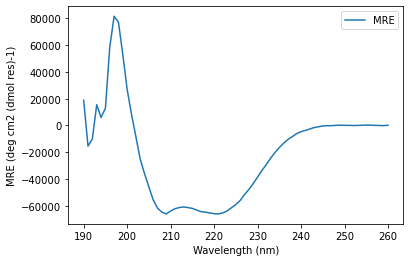

In [20]:
import matplotlib.pyplot as plt  
import numpy as np
fig,ax=plt.subplots()
Normalised_Data.plot(x = "Wavelength", y = "MRE", ax = ax)
plt.ylabel("MRE (deg cm2 (dmol res)-1)")
ax.set_xlabel("Wavelength (nm)")

Add the HTV plot on a second set of axes. This indicates how much amplification of the signal is required to get a reading by the CD spectrometer so a value of above approximately 600 is considered unreliable.

Text(0, 0.5, 'HTV (AU)')

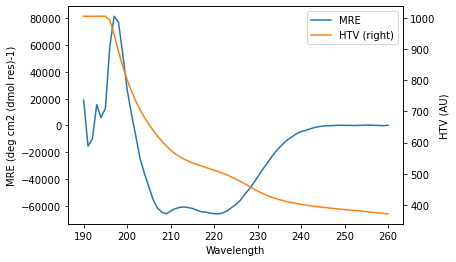

In [21]:
fig,ax=plt.subplots()
Normalised_Data.plot(x = "Wavelength", y = "MRE", ax = ax)
plt.ylabel("MRE (deg cm2 (dmol res)-1)")
ax.set_xlabel("Wavelength (nm)")
Normalised_Data.plot(x = "Wavelength", y = "HTV", ax = ax, label = "HTV", secondary_y = True)
plt.ylabel("HTV (AU)")

In [22]:
Percentage_alpha_helicity = (Normalised_Data.iloc[38,1]-theta_coil)/(theta_helix-theta_coil)
print(Percentage_alpha_helicity*100, "%")

173.27318504706088 %
